# Escolhendo com Árvores de Decisão, Random Forest e XGBoost


## 1️⃣ Introdução ao uso de árvores em modelos preditivos

**Árvores de decisão** são algoritmos que tomam decisões com base em perguntas sequenciais. São úteis quando há regras claras, não linearidade e necessidade de explicação.

- Úteis para modelos explicáveis e problemas com regras hierárquicas.
- Comparadas com regressão linear, árvores lidam melhor com não linearidade e interações complexas.


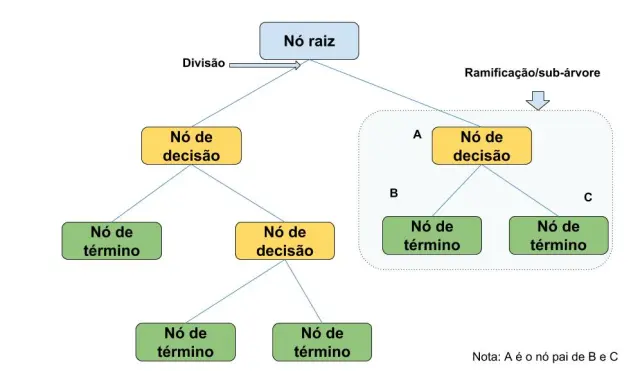

####📐 Estrutura Básica
Uma árvore de decisão é uma estrutura hierárquica usada para tomar decisões com base em dados. Ela é composta por:

* Nó raiz (root node): ponto de partida da árvore, onde ocorre a primeira divisão.
* Splits (ramificações): regras de decisão baseadas em condições (ex: “Salário > 5000?”).
* Nós internos (intermediate nodes): pontos intermediários que ainda precisam ser divididos.
* Folhas (leaf nodes): pontos finais da árvore, que contêm a previsão (ex: “cliente vai churnar” ou “previsão = R$ 30 mil”).
* Profundidade da árvore: número de níveis ou “camadas” de decisão entre a raiz e as folhas.

####🧮 Critérios de Divisão (o "cérebro" da árvore)
Durante o treinamento, a árvore precisa escolher a melhor variável e o melhor ponto de corte para dividir os dados. Ela faz isso buscando maximizar a separação entre os grupos. Os principais critérios são:

🔸 Para classificação:
Índice de Gini: mede o grau de impureza. Quanto menor o Gini, mais “puros” os grupos (ex: todos clientes churners de um lado, todos não churners do outro).

Entropia: mede a desordem ou incerteza dos dados. Busca reduzir a entropia em cada divisão.

🔸 Para regressão:
Erro quadrático médio (MSE): mede o quanto os valores reais se afastam da média dentro de cada grupo. A árvore tenta minimizar esse erro ao criar os splits.

####✅ Vantagens
* Interpretação simples: é possível explicar as decisões da árvore com frases do tipo “se idade > 35 e renda < R$ 3000, então...”.
* Lida com dados não lineares: ao contrário da regressão linear, a árvore consegue lidar com relações complexas entre as variáveis.
* Pouco pré-processamento: não exige normalização de variáveis nem codificação dummy se for uma árvore pura.

####⚠️ Limitações
* Overfitting: árvores muito profundas podem “decorar” os dados de treino e errar nos dados novos. Uma árvore com 20 níveis pode parecer ótima no treino e péssima na prática.
* Instabilidade: pequenas mudanças nos dados podem gerar árvores bem diferentes, porque cada split afeta os próximos.

## 📦 Carregando o dataset (prever se um cliente será inadimplente)

In [18]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

# Gerar dados brutos
X, y = make_classification(n_samples=1000, n_features=6, n_informative=4,
                           n_redundant=1, n_classes=2, random_state=42)

# Criar DataFrame com nomes temporários
df = pd.DataFrame(X, columns=[
    'Idade_bruta', 'Renda_Mensal_bruta', 'Tempo_Emprego_bruta',
    'Score_bruta', 'Dividas_bruta', 'Compras_online_bruta'
])
df['Inadimplente'] = y

# Transformações para nomes e valores realistas
df['Idade'] = (np.abs(df['Idade_bruta']) * 15 + 20).astype(int)
df['Renda_Mensal'] = (np.abs(df['Renda_Mensal_bruta']) * 2500 + 1500).round(2)
df['Tempo_Emprego'] = (np.abs(df['Tempo_Emprego_bruta']) * 3).round(1)
df['Score_Credito'] = (np.abs(df['Score_bruta']) * 200 + 400).astype(int)
df['Valor_Dividas'] = (np.abs(df['Dividas_bruta']) * 5000).round(2)
df['Num_Compras_Online'] = (np.abs(df['Compras_online_bruta']) * 10).astype(int)

# Selecionar apenas as colunas limpas
df_final = df[[
    'Idade', 'Renda_Mensal', 'Tempo_Emprego', 'Score_Credito',
    'Valor_Dividas', 'Num_Compras_Online', 'Inadimplente'
]]

In [20]:
df_final.head()

,Idade,Renda_Mensal,Tempo_Emprego,Score_Credito,Valor_Dividas,Num_Compras_Online,Inadimplente
0,25,6955.94,0.8,477,4463.62,8,1
1,47,1922.69,4.9,776,12375.76,2,0
2,33,4913.70,4.0,546,7670.09,17,1
3,37,6503.73,0.3,705,12010.53,28,1
4,33,5219.42,4.1,709,10581.84,10,1


## 🌲 Treinando uma árvore de decisão para regressão

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Separar X e y
X = df_final.drop('Inadimplente', axis=1)
y = df_final['Inadimplente']

In [22]:
# 2. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# 3. Treinar o modelo de Árvore de Decisão
modelo_arvore = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo_arvore.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [33]:
# 4. Fazer previsões
y_pred = modelo_arvore.predict(X_test)

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.35      0.49       158
           1       0.56      0.93      0.70       142

    accuracy                           0.62       300
   macro avg       0.70      0.64      0.60       300
weighted avg       0.71      0.62      0.59       300

📉 Matriz de Confusão:


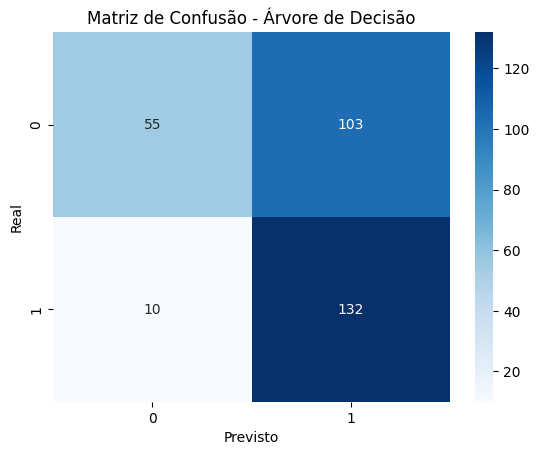

In [34]:
# 5. Avaliação do modelo
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("📉 Matriz de Confusão:")
matriz = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

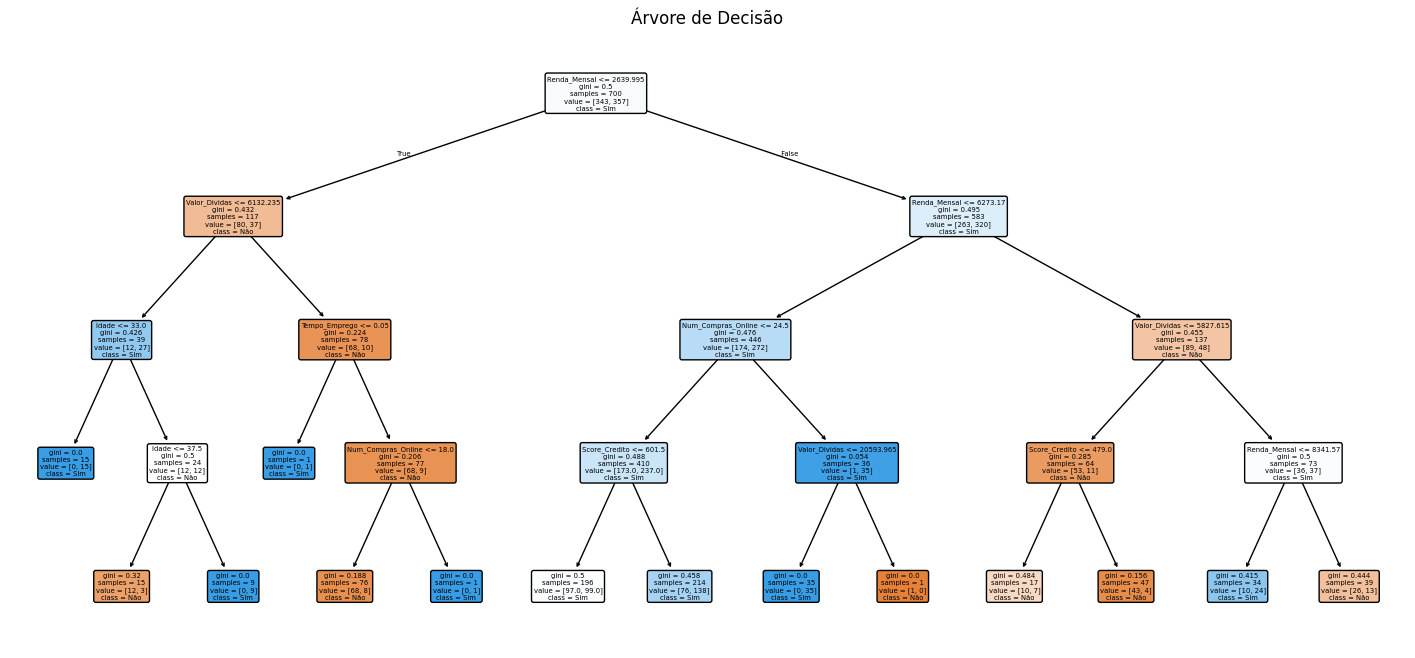

In [25]:
# 6. Visualização da Árvore
plt.figure(figsize=(18, 8))
plot_tree(modelo_arvore, feature_names=X.columns, class_names=['Não', 'Sim'], filled=True, rounded=True)
plt.title("Árvore de Decisão")
plt.show()



## 🌲 🌲 🌲 Introdução ao Random Forest

O Random Forest (ou Floresta Aleatória) é um modelo de machine learning supervisionado que combina diversas árvores de decisão para gerar previsões mais robustas, estáveis e precisas.

####🔁 O que significa "ensemble"?

É uma técnica que combina vários modelos fracos (como árvores de decisão individuais) para criar um modelo forte.

O Random Forest é um tipo de ensemble que utiliza o método chamado bagging.

####📦 O que é Bagging?

Bagging (Bootstrap Aggregating) é um processo com duas etapas principais:

* Gera vários subconjuntos aleatórios (com reposição) a partir do conjunto de treino.
* Treina uma árvore de decisão diferente para cada subconjunto.
* Cada árvore vê uma parte diferente dos dados. Isso reduz a chance de overfitting que uma árvore sozinha poderia ter.

#### 🤝 Como o Random Forest funciona?
* Cria diversas árvores de decisão com dados ligeiramente diferentes (por causa do bagging).
* Cada árvore dá uma "opinião" (classificação ou previsão).
* No final: Para classificação, o modelo usa votação majoritária (a classe mais votada é escolhida). Para regressão, ele faz a média das previsões das árvores.

✅ Vantagens:
* Reduz a variância em relação a uma árvore isolada.
* Menos propenso a overfitting, mesmo com muitas variáveis.
* Funciona bem com dados complexos e não lineares.
* Permite ver a importância das variáveis no modelo.

⚠️ Limitações:
* Menor interpretabilidade do que uma única árvore.
* Pode ser mais lento em tempo de treino e previsão, especialmente com muitos dados e árvores.
* Pode ser mais difícil explicar para o time de negócio.


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Separar X e y
X = df_final.drop('Inadimplente', axis=1)
y = df_final['Inadimplente']

# 2. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
# 3. Treinar o modelo de Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
modelo_rf.fit(X_train, y_train)

# 4. Fazer previsões
y_pred_rf = modelo_rf.predict(X_test)

📊 Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.59      0.68       158
           1       0.65      0.85      0.74       142

    accuracy                           0.71       300
   macro avg       0.73      0.72      0.71       300
weighted avg       0.74      0.71      0.71       300

📉 Matriz de Confusão - Random Forest:


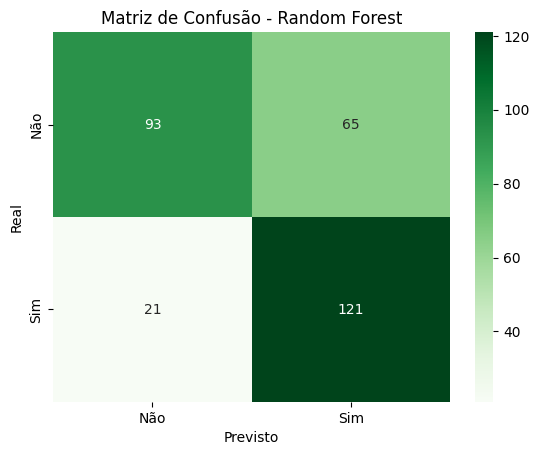

In [40]:
# 5. Avaliação do modelo
print("📊 Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("📉 Matriz de Confusão - Random Forest:")
matriz_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matriz_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

In [41]:
# 6. Importância das Features
importances = modelo_rf.feature_importances_
import pandas as pd

df_importancia = pd.DataFrame({
    'Feature': X.columns,
    'Importância': importances
}).sort_values(by='Importância', ascending=False)

<ipython-input-13-83eb696807e9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importancia, x='Importância', y='Feature', palette='viridis')


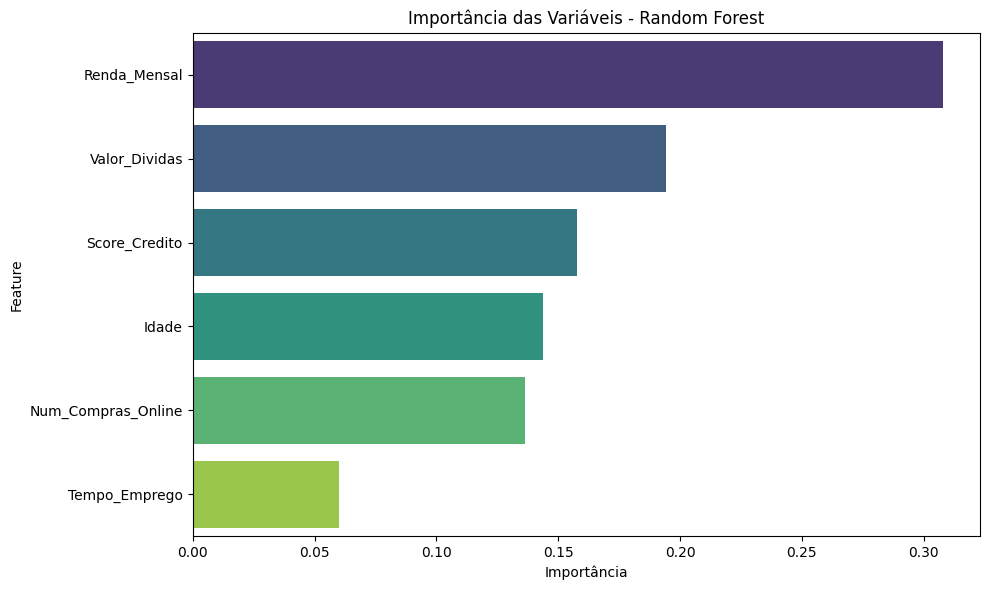

In [13]:
# 7. Visualizar Importância das Variáveis
plt.figure(figsize=(10, 6))
sns.barplot(data=df_importancia, x='Importância', y='Feature', palette='viridis')
plt.title('Importância das Variáveis - Random Forest')
plt.tight_layout()
plt.show()



## 🚀 Introdução ao XGBoost

Boosting é uma técnica de ensemble, assim como bagging (usado no Random Forest), mas funciona de forma bem diferente:
* Bagging (ex: Random Forest): cria muitos modelos independentes (como árvores) e combina os resultados.
* Boosting (ex: XGBoost): cria modelos sequenciais, onde cada novo modelo tenta corrigir os erros do anterior.


####🔄 Como o XGBoost funciona?

1.   Começa com uma árvore de decisão simples (chamada “árvore fraca”).
2.   Avalia os erros (resíduos) do modelo.
3.   Cria uma nova árvore focada em prever os erros do modelo anterior.
4.   Repete isso várias vezes, somando as previsões das árvores anteriores e ajustando os pesos.
5.   Aplica regularização (penalização) para evitar que o modelo fique superajustado.
6.   No final, temos um modelo poderoso composto de várias árvores que aprenderam com os erros umas das outras.

####📊 XGBoost é ideal para:
* Dados estruturados/tabulares.
* Problemas de classificação e regressão.
* A relação entre as variáveis é não linear.
* Há muitas variáveis e precisamos selecionar automaticamente as mais relevantes.
* O modelo precisa ter alta performance preditiva.

####✅ Vantagens do XGBoost:
* Altíssima performance com grandes bases.
* Controle preciso de overfitting via regularização (L1 e L2).
* Suporte a missing values (ele aprende o melhor caminho para valores nulos).
* Capacidade de paralelizar o treinamento.
* Fácil de extrair importância das variáveis.
* Integração com ferramentas como scikit-learn e SHAP.

####⚠️ Desvantagens:
* Menos interpretável que uma árvore ou até que o Random Forest.
* Mais sensível a hiperparâmetros — precisa de mais tuning para atingir o melhor desempenho.
* Pode levar mais tempo de treino, principalmente com dados pequenos.

####🛠️ Hiperparâmetros importantes no XGBoost:

| Parâmetro                 | O que faz                                            |
| ------------------------- | ---------------------------------------------------- |
| `n_estimators`            | Número de árvores                                    |
| `max_depth`               | Profundidade máxima das árvores                      |
| `learning_rate`           | Quanto cada árvore nova corrige dos erros anteriores |
| `subsample`               | Porcentagem dos dados usados em cada árvore          |
| `colsample_bytree`        | Porcentagem das features usadas em cada árvore       |
| `gamma`                   | Penalização para splits (regularização)              |
| `reg_alpha`, `reg_lambda` | Regularização L1 e L2                                |


####📈 Comparação com outros modelos

| Modelo           | Interpretável | Performance    | Cuidado com Overfitting |
| ---------------- | ------------- | -------------- | ----------------------- |
| Regressão Linear | Alta          | Baixa          | Baixo                   |
| Decision Tree    | Média         | Média          | Alto                    |
| Random Forest    | Média         | Alta           | Médio                   |
| **XGBoost**      | Baixa         | **Muito Alta** | **Baixo (controlável)** |



In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier  # Correto para classificação

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar e treinar o modelo
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Fazer previsões
y_pred = xgb.predict(X_test)

# Avaliar modelo
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Acurácia: {acc:.2f}")
print(report)

Acurácia: 0.73
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       104
           1       0.69      0.79      0.74        96

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200



## 📊 Avaliação de modelos

In [48]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Dicionário com os modelos treinados
modelos = {
    'Árvore de Decisão': modelo_arvore,
    'Random Forest': modelo_rf,
    'XGBoost': xgb
}

print("🔍 Avaliação dos Modelos de Regressão\n" + "-"*40)

# Avaliar cada modelo
for nome, modelo in modelos.items():
    pred = modelo.predict(X_test)

    # Cálculo das métricas
    r2 = r2_score(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))  # Corrigido: RMSE = sqrt(MSE)

    # Impressão formatada
    print(f"{nome:<20} | R²: {r2:.4f} | RMSE: {rmse:.2f}")

print("-"*40)


🔍 Avaliação dos Modelos de Regressão
----------------------------------------
Árvore de Decisão    | R²: -0.5024 | RMSE: 0.61
Random Forest        | R²: -0.0016 | RMSE: 0.50
XGBoost              | R²: -0.0817 | RMSE: 0.52
----------------------------------------



## 8️⃣ Conclusão

- Árvores simples são explicáveis, mas menos precisas.
- Random Forest oferece bom equilíbrio entre estabilidade e performance.
- XGBoost entrega alta performance, ideal para competições e ambientes exigentes.
